### sklearn.ensemble.RandomForestClassifier
> class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [3]:
import pandas as pd
import numpy as np

test_df = pd.read_csv('./datasets/human_test.csv')
train_df = pd.read_csv('./datasets/human_train.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['Labels'] = encoder.fit_transform(train_df['Activity'])

In [5]:
import numpy as np

X_train = train_df.drop(['Activity', 'Labels','subject'], axis=1)
y_train = train_df['Labels']

X_test = test_df.drop(['Activity', 'subject'] , axis=1)
y_test = LabelEncoder().fit_transform(test_df["Activity"])

In [6]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
rfc.feature_importances_

array([2.70394335e-04, 2.70805320e-04, 1.48880292e-04, 3.15640905e-03,
       3.11514168e-04, 4.70211285e-04, 2.14210774e-03, 3.82743291e-04,
       4.60788524e-04, 8.05832499e-03, 2.55507080e-04, 2.61174628e-04,
       5.43220486e-04, 3.19937004e-04, 2.35542384e-04, 9.04252361e-04,
       7.80354797e-03, 7.12774050e-04, 3.93302579e-04, 1.31943046e-03,
       5.19913298e-04, 1.93945282e-04, 1.84352134e-03, 2.70429105e-04,
       3.90608935e-04, 1.79773976e-04, 1.74846407e-04, 1.85086400e-04,
       2.78937939e-04, 3.46530927e-04, 1.07407312e-04, 1.59768196e-04,
       2.12323752e-04, 3.13099875e-04, 2.09682737e-04, 2.28962667e-04,
       2.17362268e-04, 7.12541426e-03, 8.93584162e-04, 2.80579850e-03,
       3.63801995e-02, 2.53549070e-02, 9.62279034e-03, 2.19704601e-03,
       6.90344919e-04, 5.87176917e-04, 1.15357623e-03, 7.21587316e-04,
       2.01611127e-04, 3.03312875e-02, 2.17046259e-02, 6.40324266e-03,
       2.26496677e-02, 2.16353075e-02, 9.63932157e-03, 3.02754275e-03,
      

In [9]:
rfc_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
rfc_importances

tBodyAcc-mean()-X                       0.000270
tBodyAcc-mean()-Y                       0.000271
tBodyAcc-mean()-Z                       0.000149
tBodyAcc-std()-X                        0.003156
tBodyAcc-std()-Y                        0.000312
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000429
angle(tBodyGyroJerkMean,gravityMean)    0.000250
angle(X,gravityMean)                    0.029676
angle(Y,gravityMean)                    0.024415
angle(Z,gravityMean)                    0.012436
Length: 561, dtype: float64

In [12]:
sorted_feature_importances = rfc_importances.sort_values(ascending=False)

In [23]:
data = sorted_feature_importances[:20]
data

tGravityAcc-mean()-X                 0.036380
tGravityAcc-max()-X                  0.030331
angle(X,gravityMean)                 0.029676
tGravityAcc-mean()-Y                 0.025355
tGravityAcc-energy()-X               0.024963
angle(Y,gravityMean)                 0.024415
tGravityAcc-min()-X                  0.022650
tGravityAcc-max()-Y                  0.021705
tGravityAcc-min()-Y                  0.021635
tGravityAcc-energy()-Y               0.017179
tGravityAccMag-std()                 0.013482
tBodyAccJerk-std()-X                 0.012440
angle(Z,gravityMean)                 0.012436
fBodyAcc-mean()-X                    0.011901
fBodyAccJerk-bandsEnergy()-1,16      0.011351
fBodyAccJerk-max()-X                 0.010159
fBodyAcc-mad()-X                     0.010142
fBodyAccJerk-bandsEnergy()-1,16.1    0.010122
tGravityAcc-arCoeff()-Z,2            0.009920
fBodyAccMag-energy()                 0.009734
dtype: float64

In [37]:
df = pd.DataFrame(data, columns=['feature_importances'])
df

,feature_importances
tGravityAcc-mean()-X,0.036380
tGravityAcc-max()-X,0.030331
"angle(X,gravityMean)",0.029676
tGravityAcc-mean()-Y,0.025355
tGravityAcc-energy()-X,0.024963
"angle(Y,gravityMean)",0.024415
tGravityAcc-min()-X,0.022650
tGravityAcc-max()-Y,0.021705
tGravityAcc-min()-Y,0.021635
tGravityAcc-energy()-Y,0.017179


<AxesSubplot:xlabel='feature_importances'>

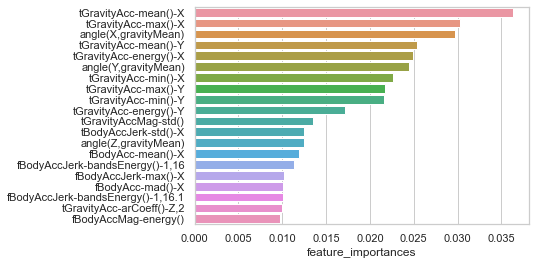

In [44]:
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel") ## figure, axes 스타일
sns.barplot(x=df.feature_importances, y=df.index, data=df, orient='h')
# sns.barplot(x='feature_importances', y=df.index, data=df, orient='h')

In [45]:
from sklearn.model_selection import GridSearchCV

params={
    "max_depth":[8, 12, 16, 20],
    "min_samples_split" : [16, 24]
}

X_train_feature_importances = X_train[df.index]

grid_cv = GridSearchCV(rfc , param_grid=params , cv=5 , verbose=1)
grid_cv.fit(X_train_feature_importances , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             verbose=1)

In [47]:
best_rfc = grid_cv.best_estimator_ 

In [51]:
pred = best_rfc.predict(X_test[df.index])
pred

array([2, 2, 2, ..., 3, 3, 3])

In [53]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

accuracy_score(y_test, pred)

0.8018323719036308